In [25]:
from TemporalDataSet import temprel_set
import matplotlib.pyplot as plt
testset = temprel_set("data/Output4LSTM_Baseline/testset-temprel.xml")
def line2labelix(line):
    elements = line.strip().split(",")
    scores = [float(x) for x in elements[4:]]
    return int(elements[3]), scores
# output1 = "/home/qning2/Servers/home/Research/illinois-temporal-lstm/output/lstm_w2v7_mode-3_sz2_gm0.5_step10_lr0.01.output"
# output1 = "/home/qning2/Servers/home/Research/illinois-temporal-lstm/output/lstm_w2v7_mode-1_hidden6464_gm0.3_step10_lr0.001_dropout_wdecay1e-2.output"
output1 = "/home/qning2/Servers/home/Research/illinois-temporal-lstm/output/lstm_w2v7_mode14_hidden6464_gm0.3_step10_lr0.001_csed32_gn0.1_csdim2_wdecay1e-2.output"
# output2 = "/home/qning2/Servers/home/Research/illinois-temporal-lstm/output/lstm_w2v6_mode-3_sz2_gm0.5_step10_lr0.01.output"
output2 = "/home/qning2/Servers/home/Research/illinois-temporal-lstm/output/rawstats_nn2layers_baseline_mode1_lr0.001_hid128_gamma0.3_step10.output"
f1 = open(output1,"r")
f2 = open(output2,"r")
results1=f1.readlines()
results2=f2.readlines()

In [26]:
def getMax(a):
    best_ix = 0
    max_val = a[0]
    for i in range(1,len(a)):
        n = a[i]
        if max_val<n:
            max_val=n
            best_ix = i
    return best_ix,max_val

In [27]:
def best_acc(alpha):
    output_labels = {"BEFORE": 0, "AFTER": 1, "EQUAL": 2, "VAGUE": 3}
    corr1=0
    corr2=0
    corr_merged=0
    for i,temprel in enumerate(testset.temprel_ee):
        gold = output_labels[temprel.label]
        pred1, scores1 = line2labelix(results1[i])
        pred2, scores2 = line2labelix(results2[i])
        scores_merged = [scores1[i]+alpha*scores2[i] for i in range(len(scores1))]
        pred_merged, _ = getMax(scores_merged)
        if pred1==gold:
            corr1+=1
        if pred2==gold:
            corr2+=1
        if pred_merged==gold:
            corr_merged+=1
    return 1.0*corr_merged/len(testset.temprel_ee)
#     print(corr1,1.0*corr1/len(testset.temprel_ee))
#     print(corr2,1.0*corr2/len(testset.temprel_ee))
#     print(corr_merged,1.0*corr_merged/len(testset.temprel_ee))

In [28]:
step=0.01
res = []
for alpha in range(500):
    res.append(best_acc(1.0*alpha*step))

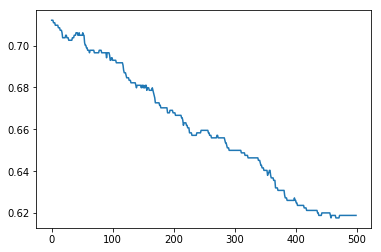

In [29]:
plt.figure()
plt.plot(res)
plt.show()